In [ ]:
!apt-get update
!apt-get install tesseract-ocr


Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Ign:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy Release [5,713 B]
Get:7 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:8 https://r2u.stat.illinois.edu/ubuntu jammy Release.gpg [793 B]
Hit:9 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Get:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [998 kB]
Get:11 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease [18.1 kB]
Hit:12 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:13 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [

In [ ]:
!tesseract --version


tesseract 4.1.1
 leptonica-1.82.0
  libgif 5.1.9 : libjpeg 8d (libjpeg-turbo 2.1.1) : libpng 1.6.37 : libtiff 4.3.0 : zlib 1.2.11 : libwebp 1.2.2 : libopenjp2 2.4.0
 Found AVX2
 Found AVX
 Found FMA
 Found SSE
 Found libarchive 3.6.0 zlib/1.2.11 liblzma/5.2.5 bz2lib/1.0.8 liblz4/1.9.3 libzstd/1.4.8


In [ ]:
import cv2
import numpy as np
import pytesseract
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [ ]:
def highlight_word(img, words_to_find):
      # Load the image
    image = cv2.imread(img)


    # Convert image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Perform OCR using pytesseract with bounding box information
    custom_config = r'--oem 3 --psm 6'
    data = pytesseract.image_to_data(gray, config=custom_config, output_type=pytesseract.Output.DICT)

    boxes = []
    n_boxes = len(data['text'])

    for word_to_find in words_to_find:
      for i in range(n_boxes):
        if int(data['conf'][i]) > 60:  # Confidence threshold
            if word_to_find.lower() in data['text'][i].lower():
                (x, y, w, h) = (data['left'][i], data['top'][i], data['width'][i], data['height'][i])
                boxes.append((x, y, w, h))

                image = cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
                # cv2.putText(image, word_to_find, (x, y -4), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36, 255, 12), 2)

    # Display the image with highlighted word
    cv2_imshow(image)
    return boxes



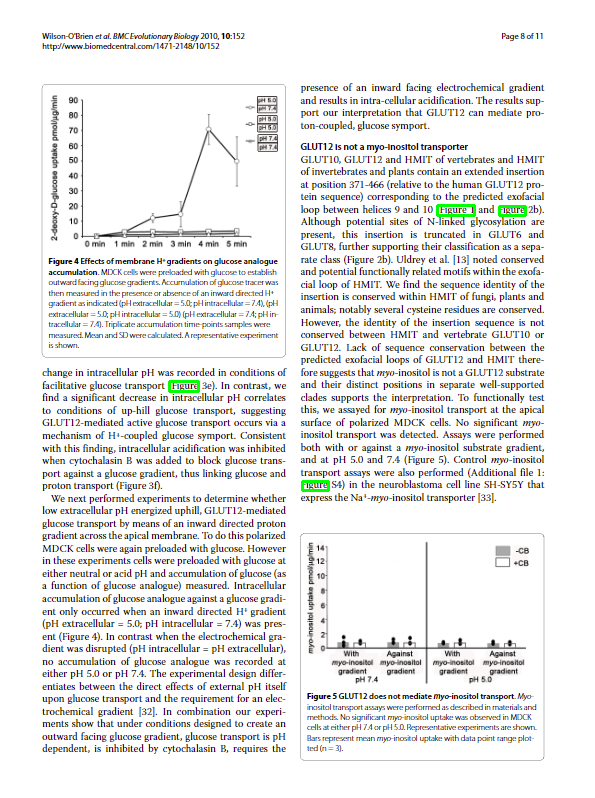

[(437, 205, 37, 10),
 (499, 206, 26, 9),
 (169, 381, 29, 10),
 (302, 481, 26, 9),
 (437, 205, 37, 10),
 (499, 206, 26, 9),
 (169, 381, 29, 10),
 (302, 481, 26, 9)]

In [ ]:
highlight_word("paper5.png", ["Fig", "Figure", "Table"])


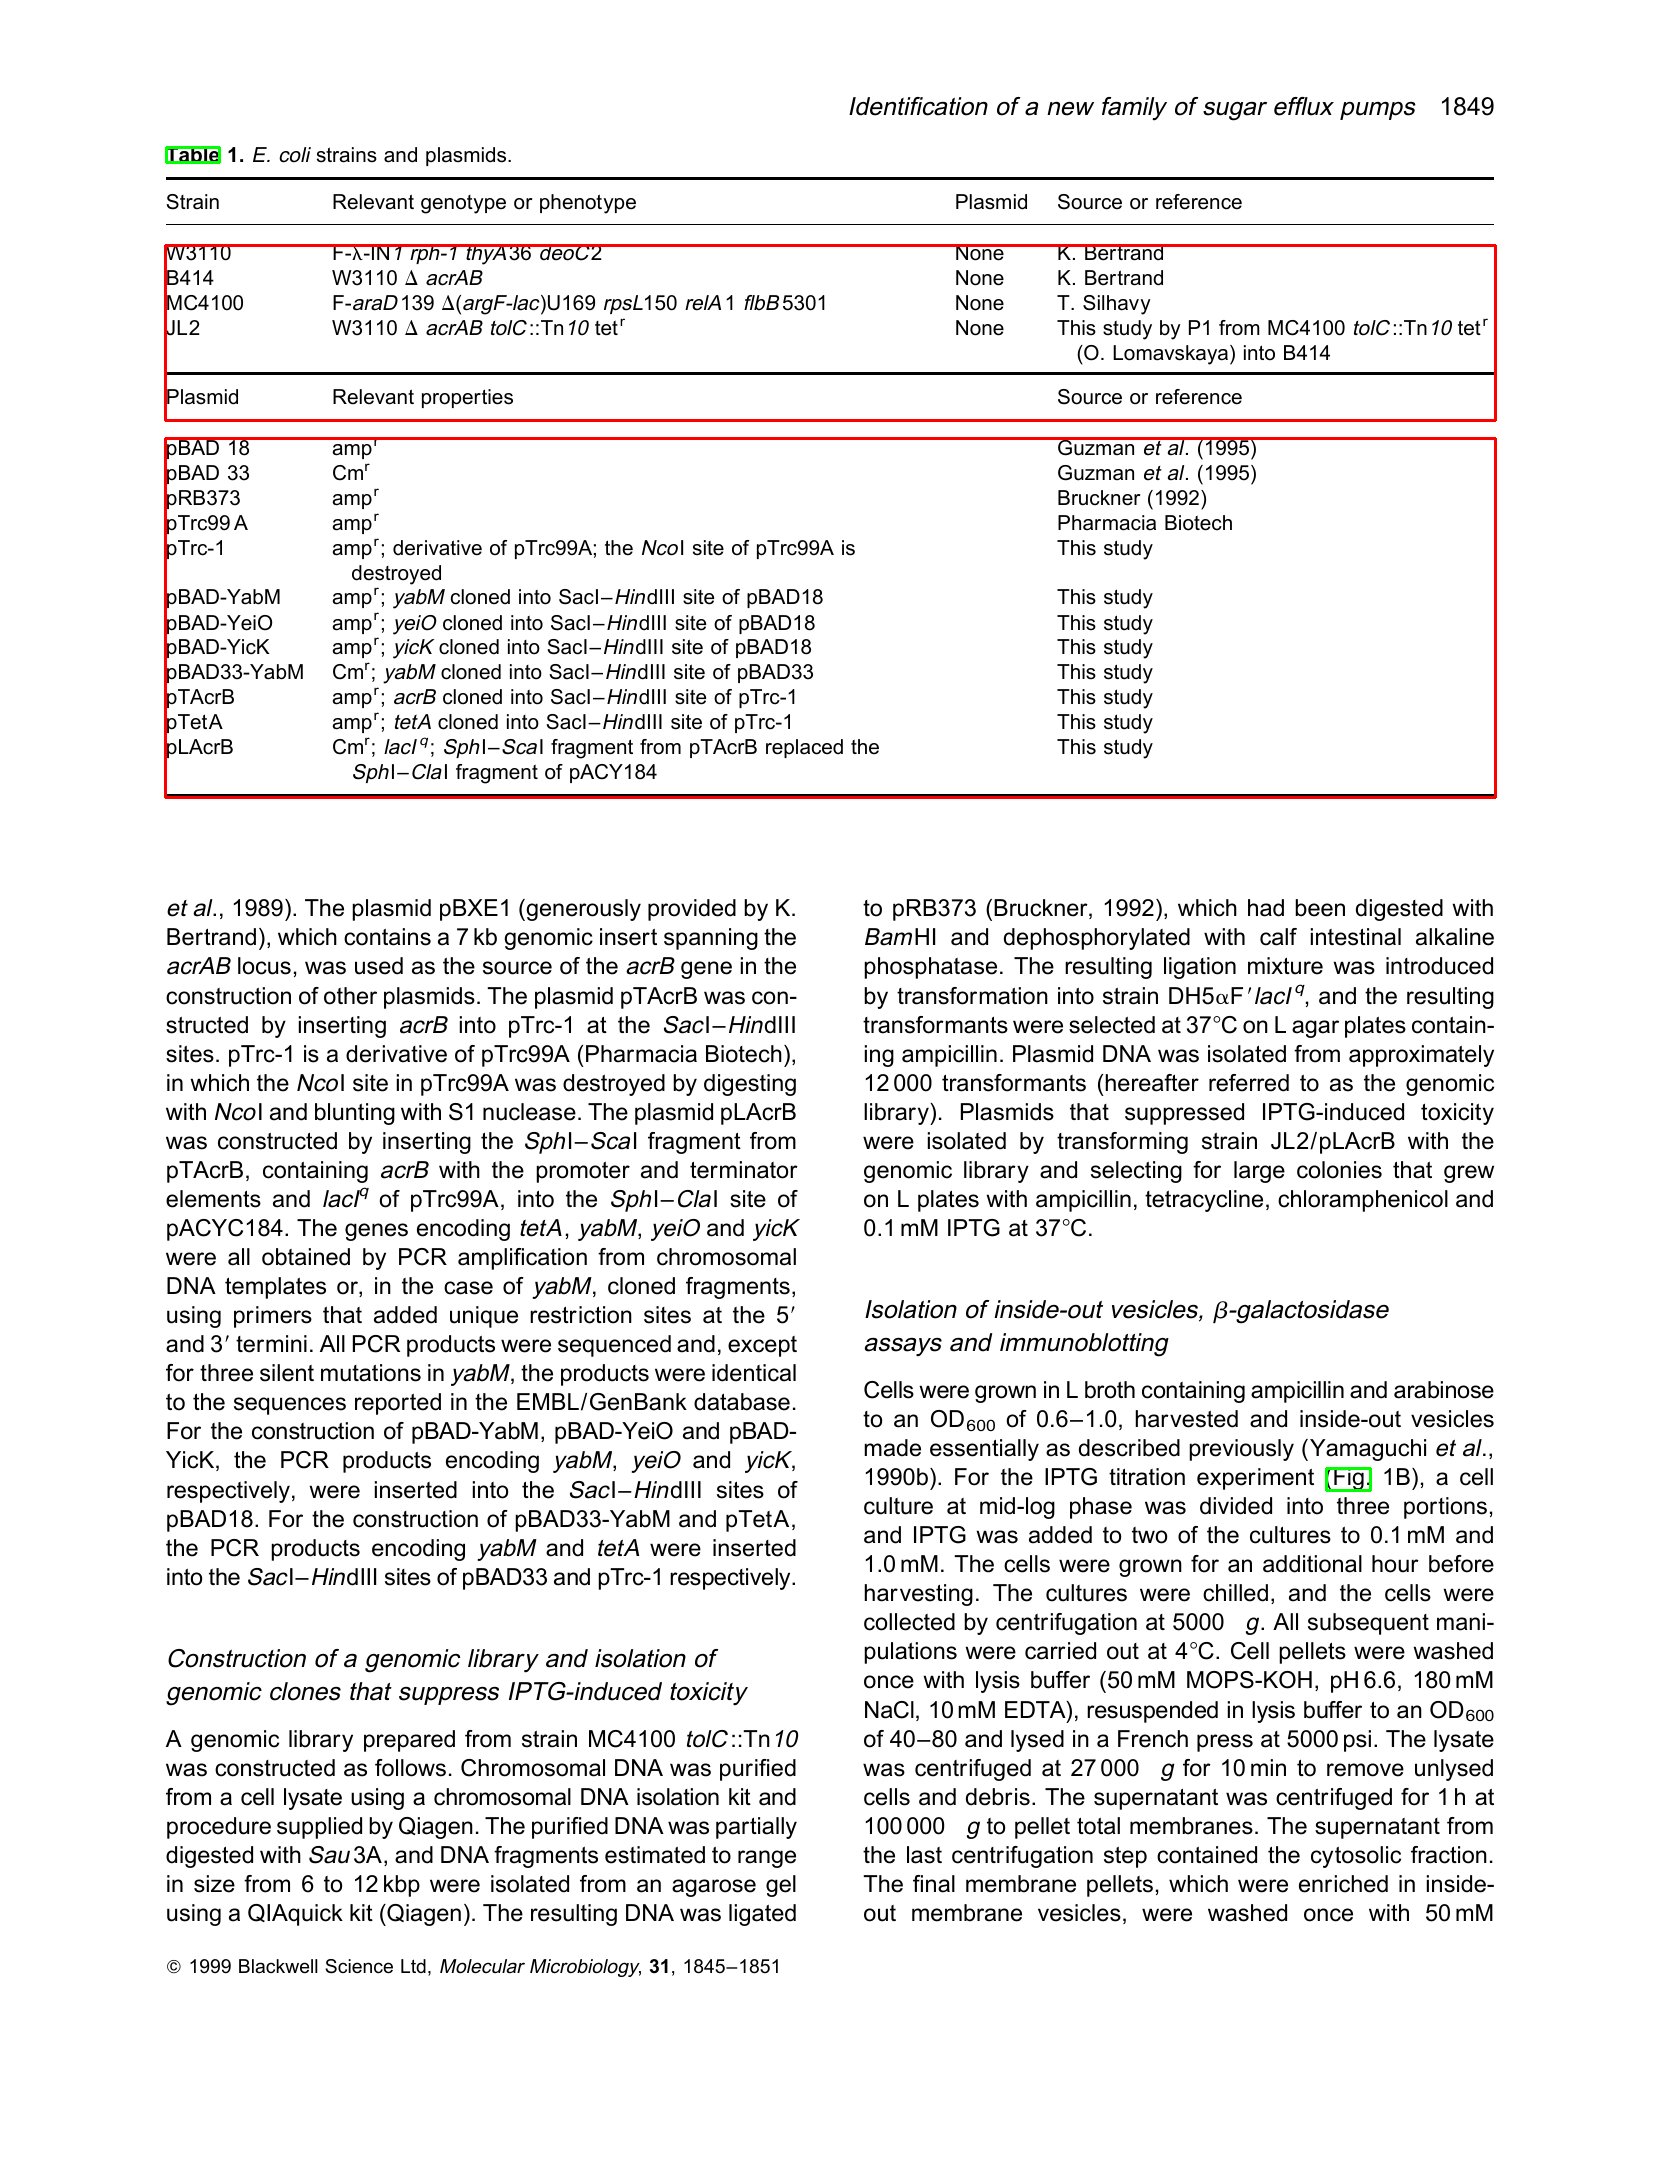

[(1326, 1468, 44, 22), (166, 147, 53, 15)]

In [ ]:
highlight_word("10209755_5.png", ["Fig", "Figure", "Table"])


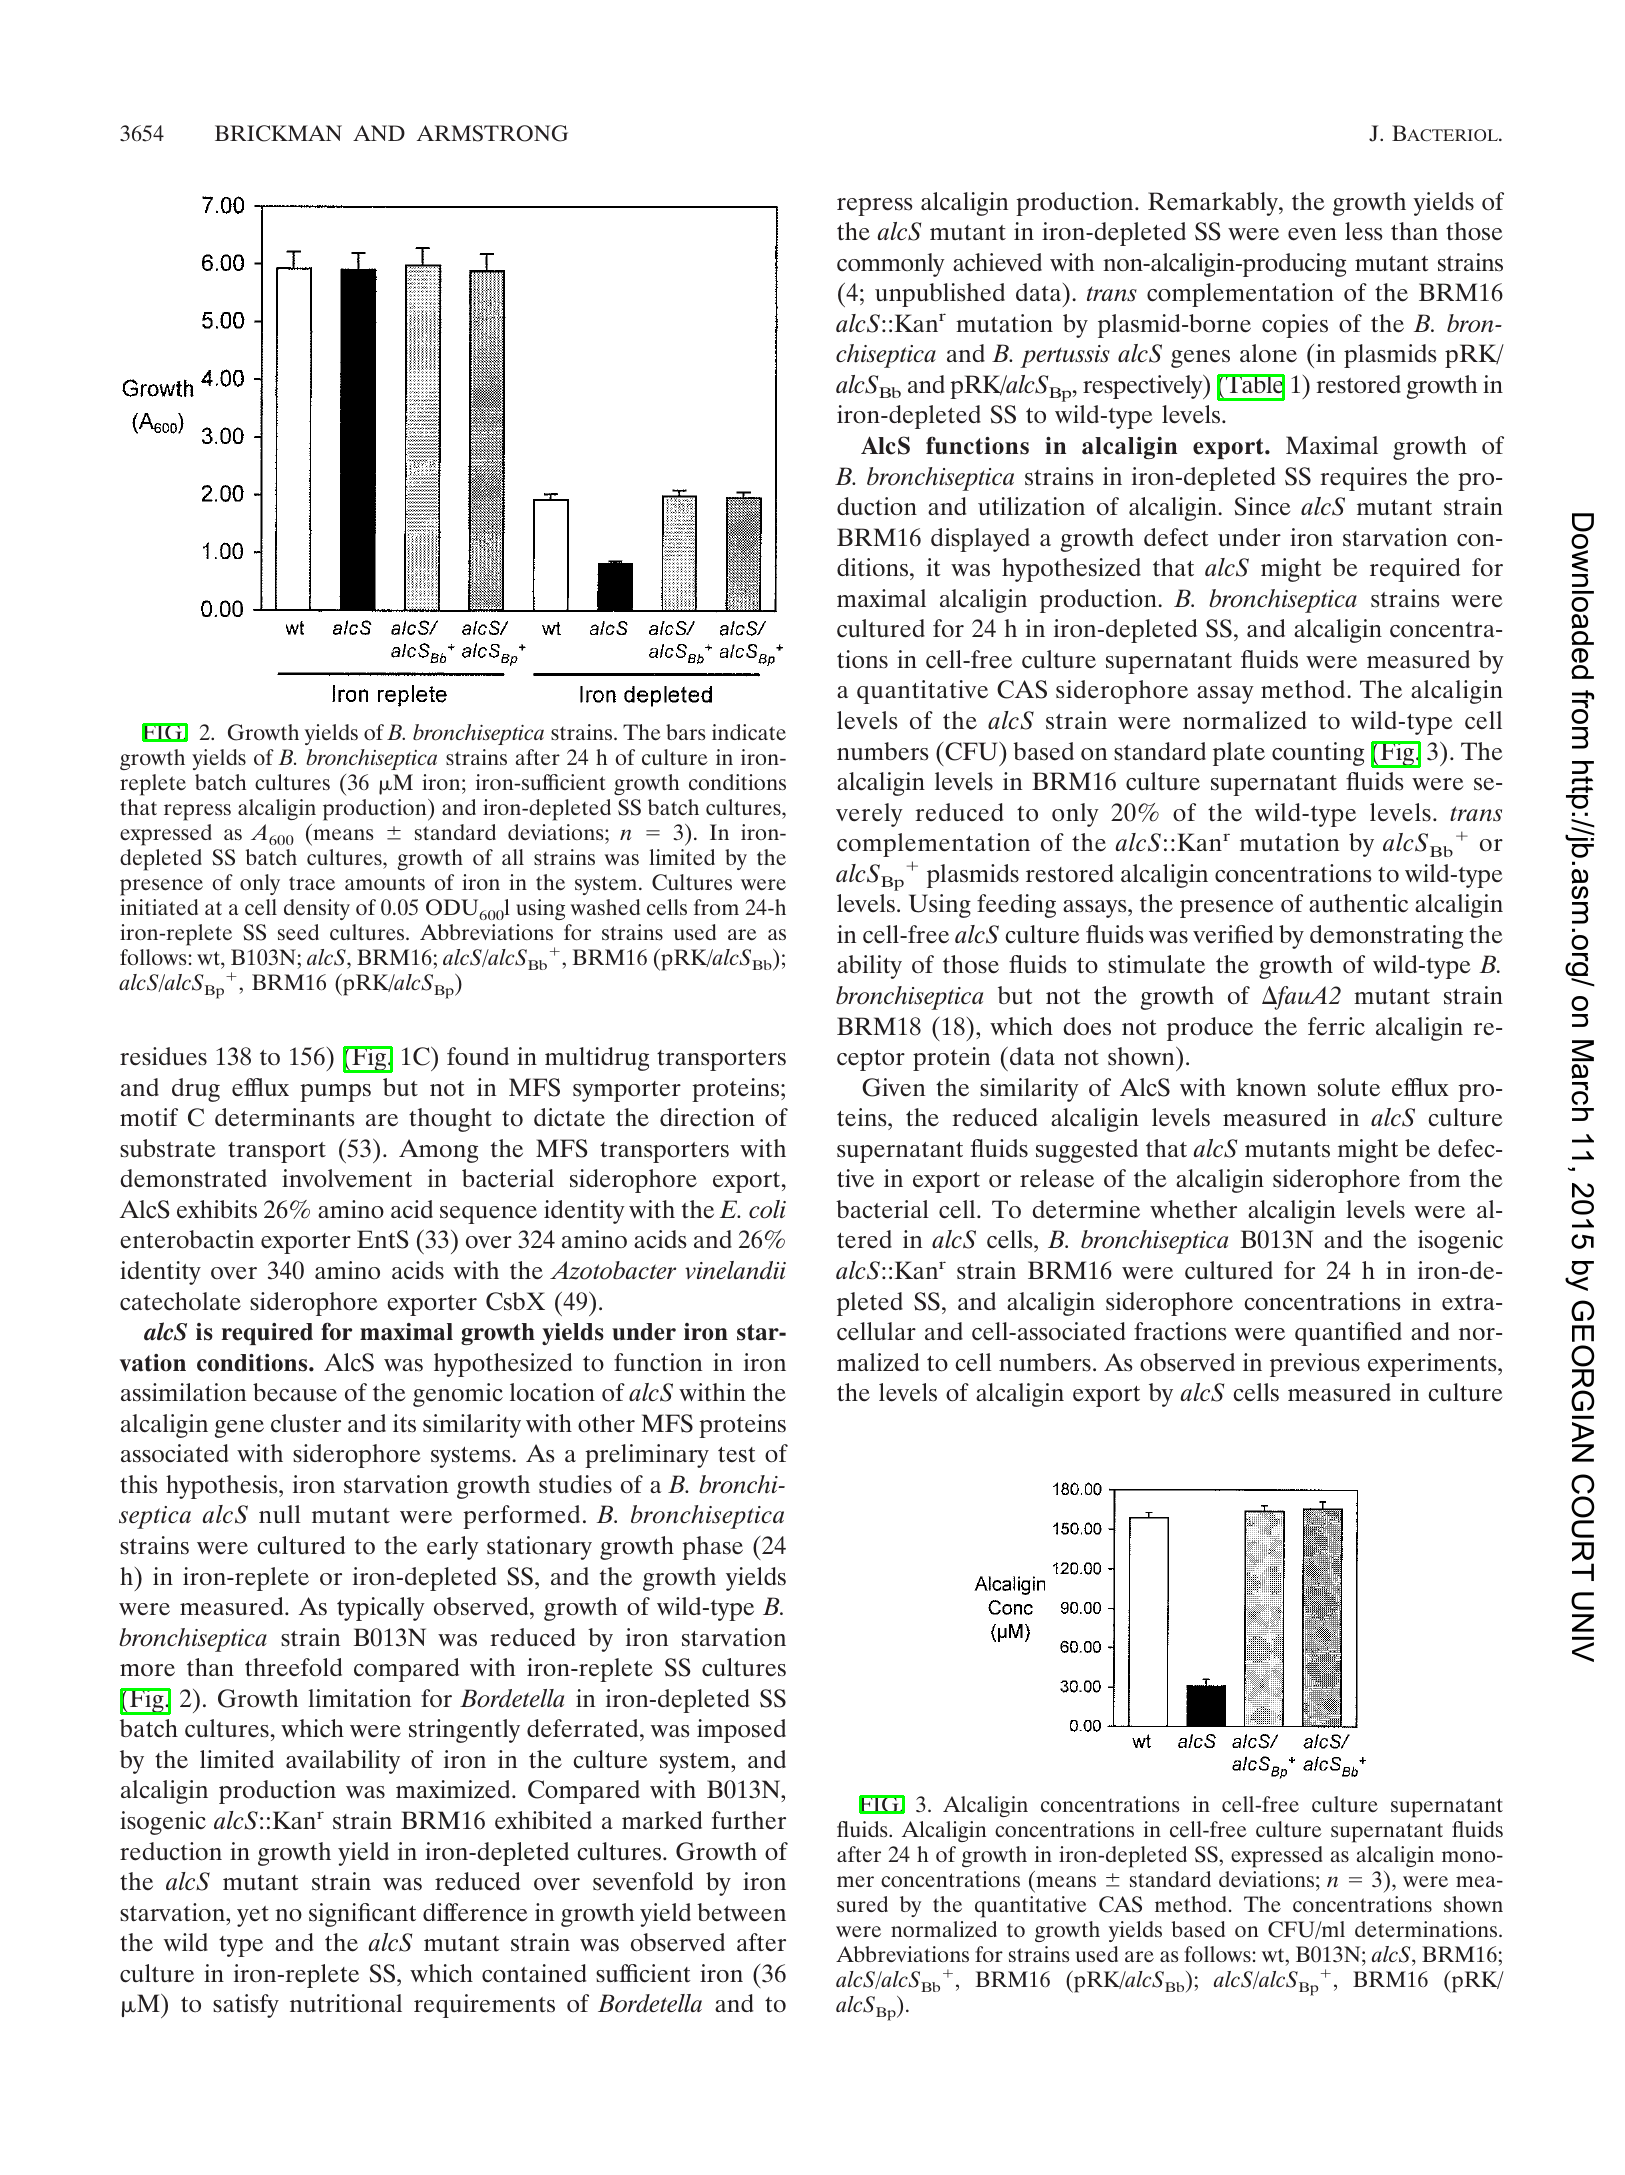

[(143, 724, 43, 16),
 (1372, 742, 47, 24),
 (344, 1047, 47, 24),
 (121, 1689, 48, 24),
 (860, 1796, 43, 16),
 (1218, 375, 65, 24)]

In [ ]:
highlight_word("15901687_5.png", ["Fig", "Figure", "Table"])


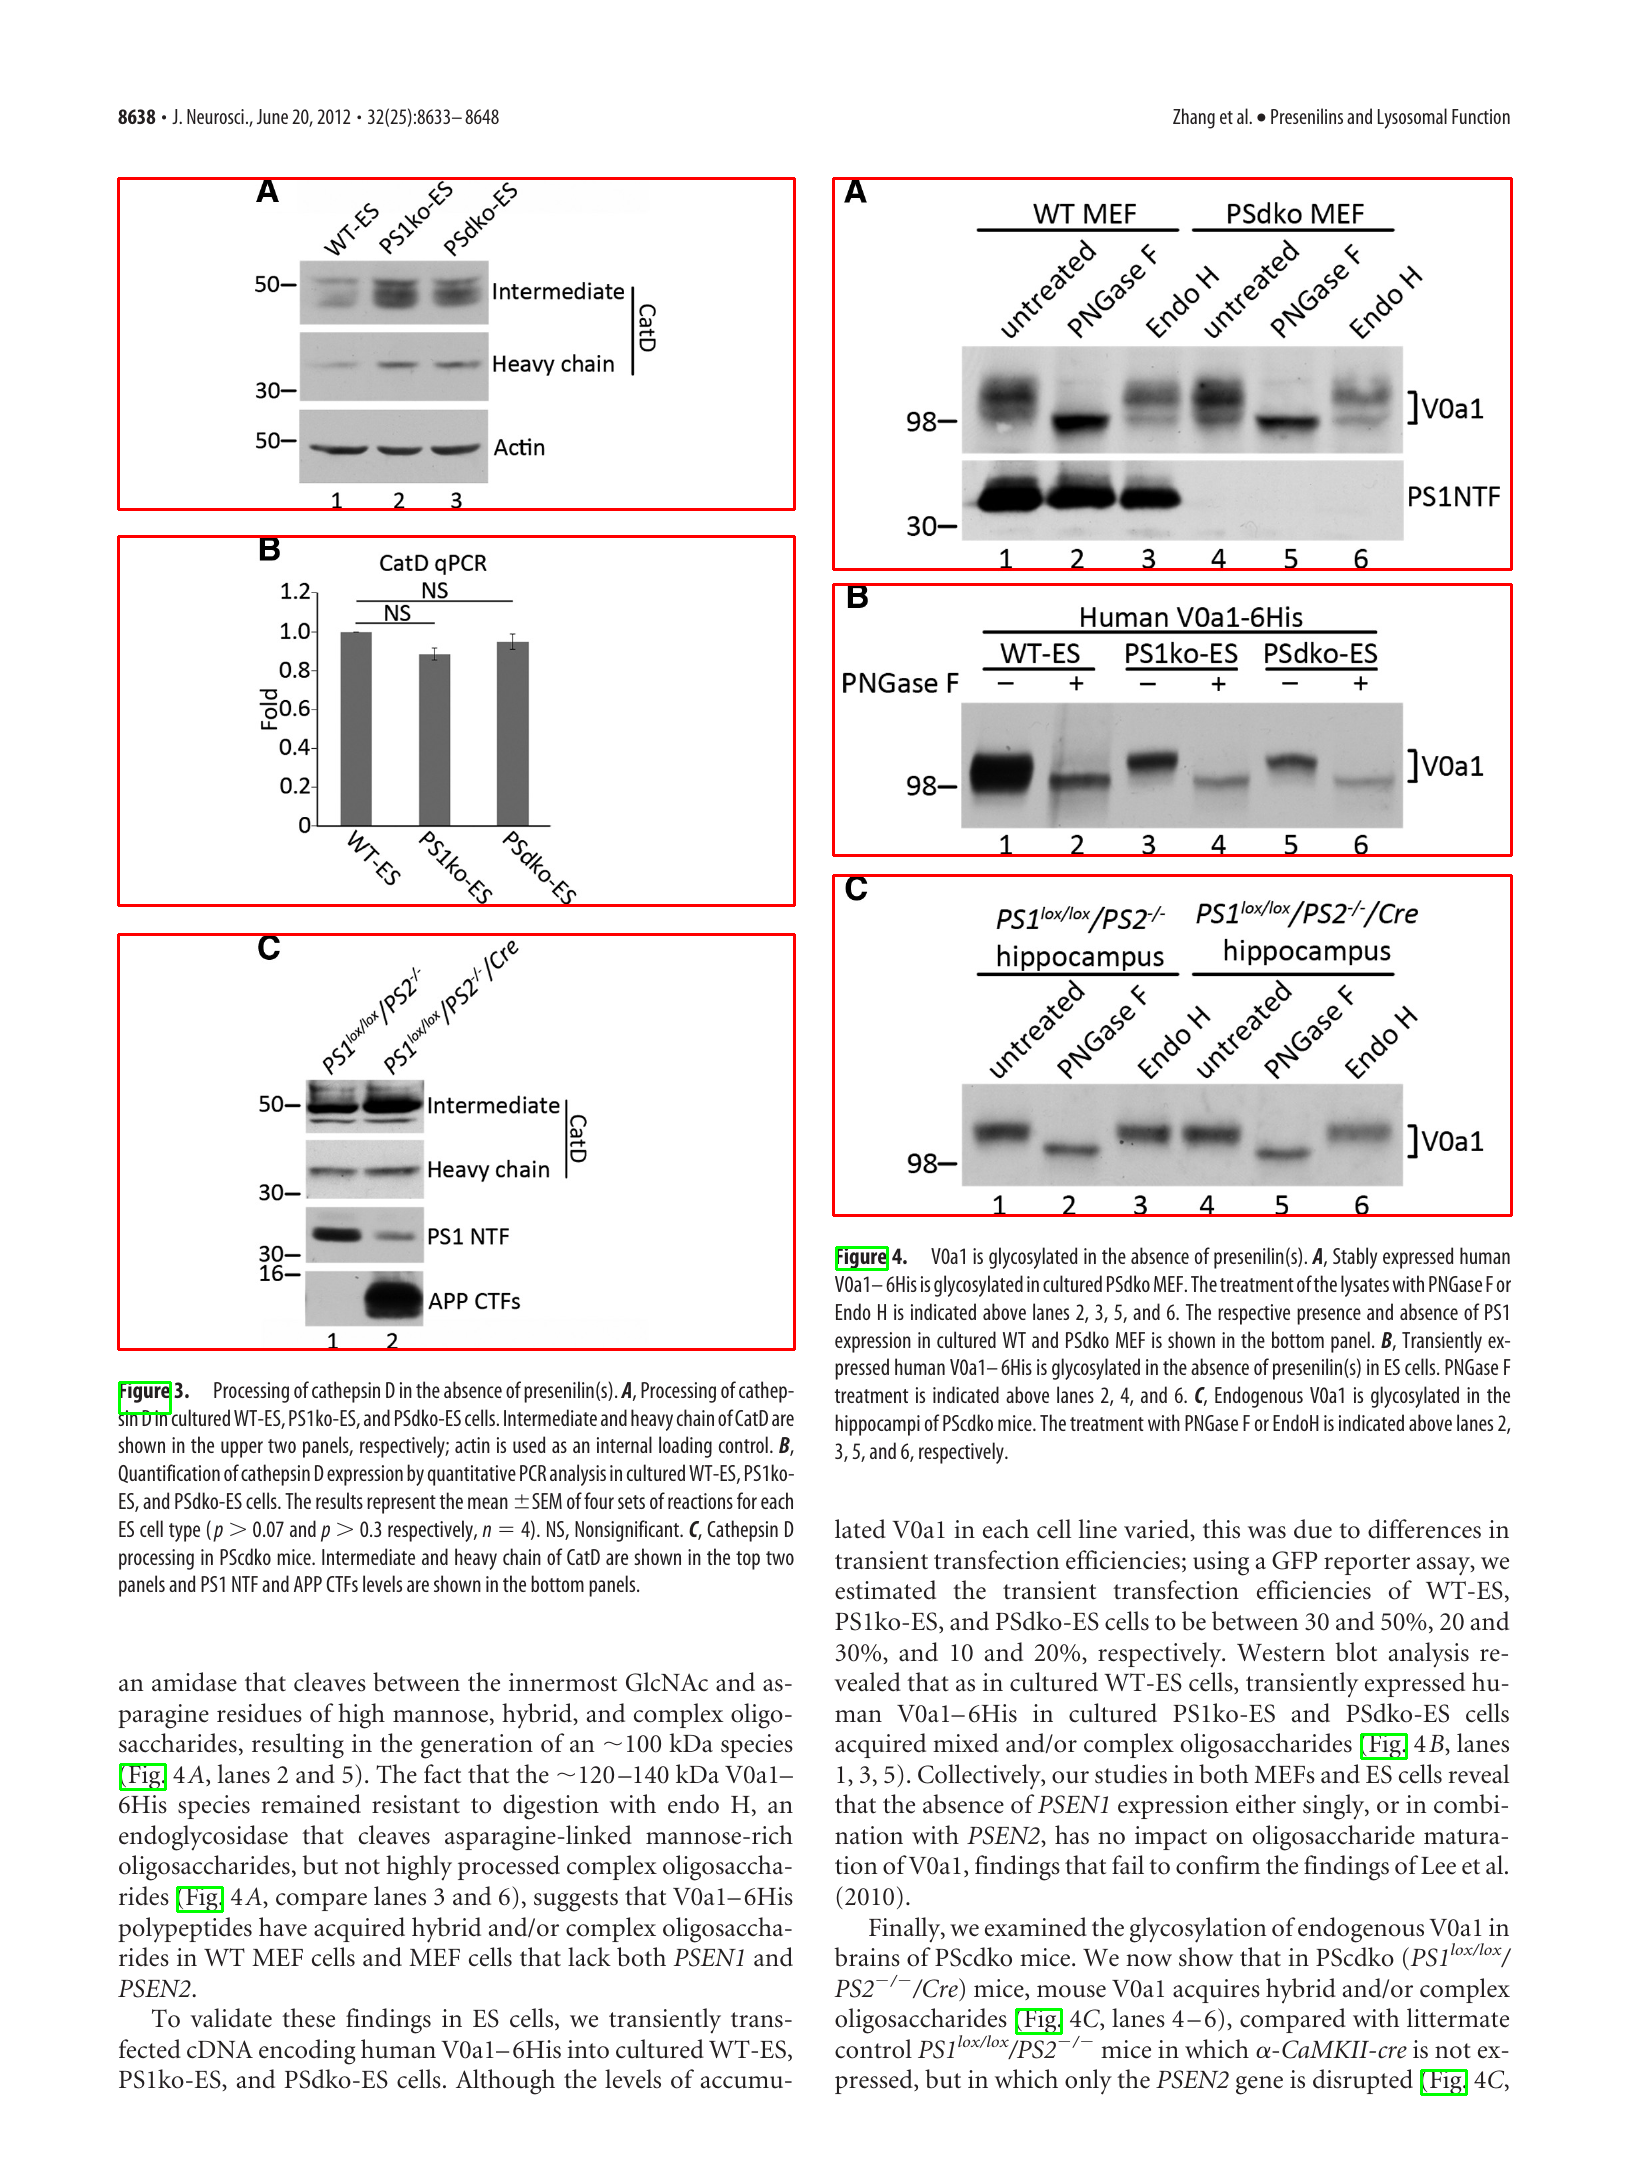

[(836, 1247, 51, 22),
 (119, 1382, 51, 31),
 (1361, 1734, 45, 24),
 (120, 1764, 45, 25),
 (177, 1887, 45, 24),
 (1016, 2009, 45, 24),
 (1421, 2070, 45, 24),
 (836, 1247, 51, 22),
 (119, 1382, 51, 31)]

In [ ]:
highlight_word("22723704_6.png", ["Fig", "Figure", "Table"])